# Tensorflow Object Detection API

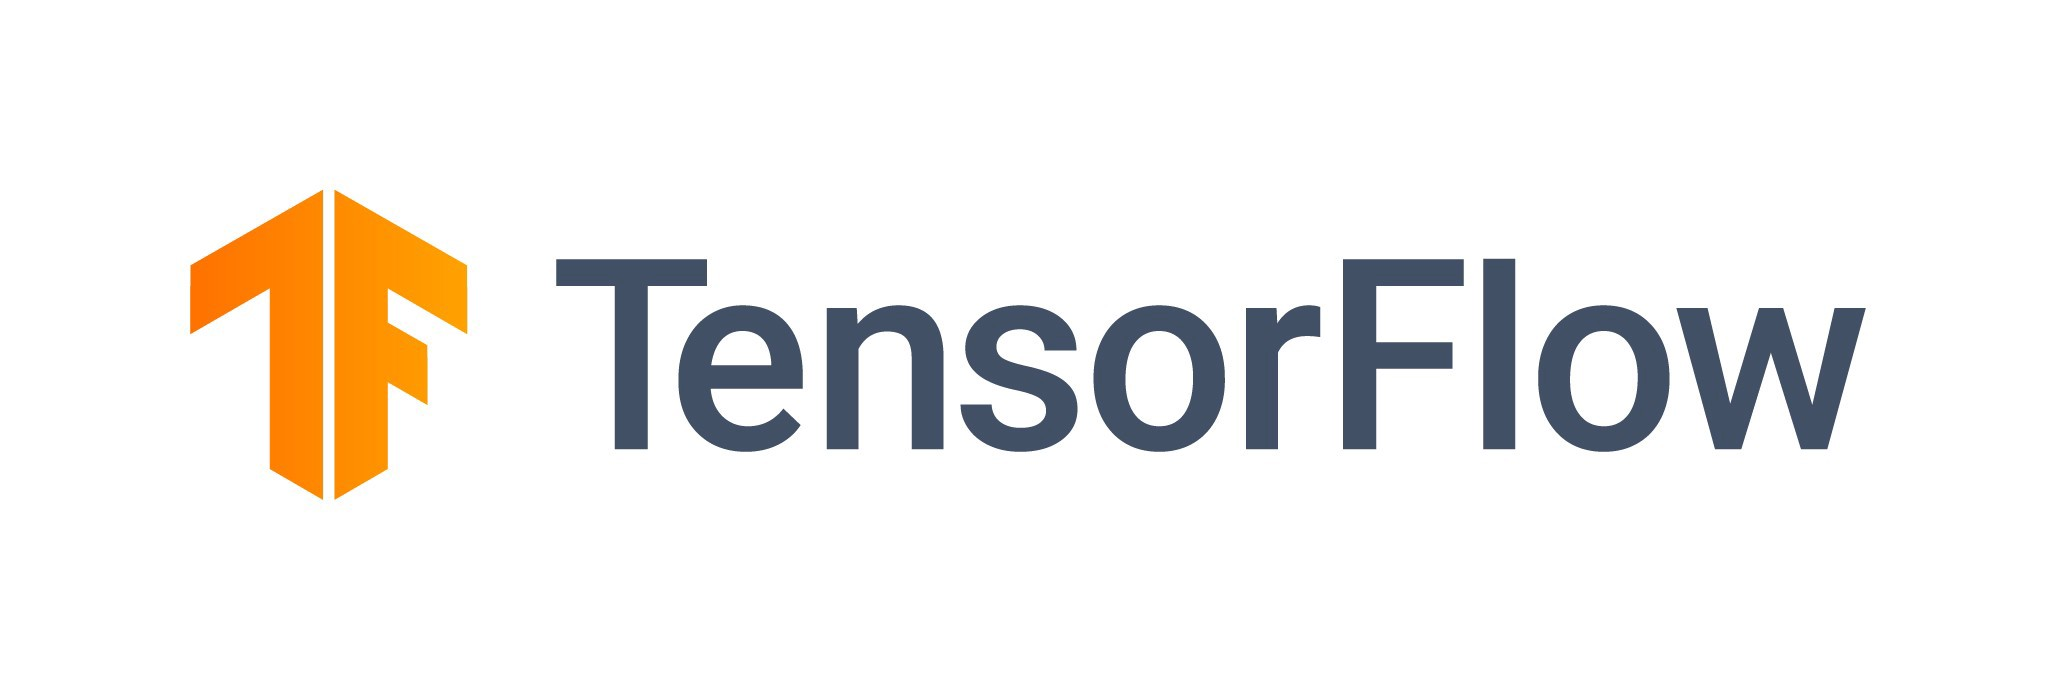

Tek bir görüntüde birden çok nesneyi yerelleştirip tanımlayabilen doğru makine öğrenimi modelleri oluşturmak bilgisayar görüşünde temel bir zorluk olmaya devam etmektedir. TensorFlow Nesne Algılama API'sı, TensorFlow'un üzerine inşa edilmiş ve nesne algılama modellerinin oluşturulmasını, eğitilmesini ve dağıtılmasını kolaylaştıran açık kaynaklı bir çerçevedir.

# İçerik

|---------------------------------------------------------------------------------------------------|

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Veri Toplama Ve Etiketleme
       
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Verilerin Boyutunu Eşitleme
      
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Örnek Bir Veri Etiketleme
      
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) xml dosyalarını csv dosyasına dönüştürme
      
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Eğitim için TFRecords oluşturma
      
        * ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) train.record
          
        * ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) test.record
        
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet
    
|---------------------------------------------------------------------------------------------------|
      
* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Nesne Tespiti Teorik Bilgi (Opsiyonel)

    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Nesne Tanıma - Bölge önerisi
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Region-Based Conolutional Nerual Network (R-CNN)
     
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Fast R-CNN
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Faster R-CNN
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Single Shot Multibox Detecton (SSD)
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Mask R-CNN
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) YOLO
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet
    
|---------------------------------------------------------------------------------------------------|

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Eğitimi Yapılandırma

    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Etiket haritası oluşturma
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Eğitim yapılandırması oluşturma
    
        * ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) Simdi bu .config dosyasını düzenleyelim
        
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet
    
|---------------------------------------------------------------------------------------------------|

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Modeli Eğitme

    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) TensorBoard
    
    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet
    
|---------------------------------------------------------------------------------------------------|
    
* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Çıkarım Grafiğini Dışa Aktarma

|---------------------------------------------------------------------------------------------------|

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) TEST

    * ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Kaynaklar

* ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) İletişim - Hataların Çözümü

|---------------------------------------------------------------------------------------------------|

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Veri Toplama Ve Etiketleme

Veri makine öğrenmesi için önemli bir yere sahiptir.
Herhangi bir AI modeli oluşturmak için ilk sahip olmanız gereken şey Veri 'dir.
Eğer veri ham haldeyse işinize yaramaz, kullanmak için çeşitli işlemlerden geçirmelisiniz, etiketlemelisiniz.
Bizim sunumumuzda konumuz nesne tespiti olduğu için verilerimiz görüntüler olacaktır. Veri seti, taş kağıt makas veri setidir, biz bu veri setindeki nesneleri 'Sag', 'Sol' ve 'Dur' şeklinde etikeleyip eğitim yapacağız.

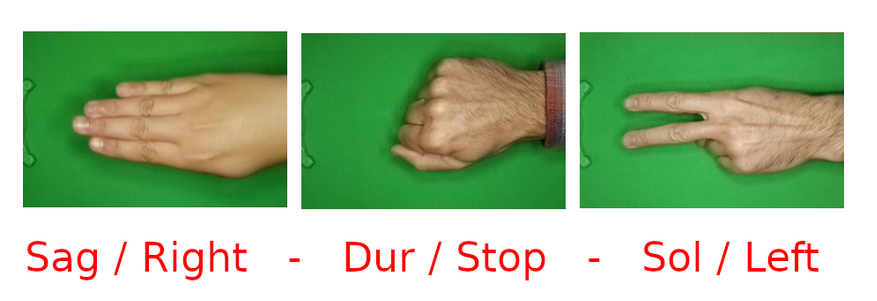

* Kullanacağımız ham veriler : https://www.kaggle.com/drgfreeman/rockpaperscissors
* Etiketlenmiş veriler : https://www.kaggle.com/ahmetfurkandemr/racing-game-with-computer-vision-datasets

Bir AI modeli için gerekli olan önemli parçalar:

* Veri
* Algoritma
* Donanım (Gpu/Tpu/Cpu)

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Verilerin Boyutunu Eşitleme

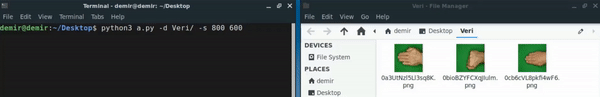

↳ Verilerin boyutlarını eşitlememizin sebebi tüm resimlerin aynı boyutta olmasını sağlamak,
Veri setinde çok büyük boyutlu resimler varsa gereksiz güç harcama yapar.
Bunun için Tensorflow_Object_Detection klasörü içerisinde bulunan Veriİşleme klasöründeki image_size.py python script dosyasını kullanacağız. "python3 image_size.py -d veri_yolu/ -s  görüntü yüksekliği görüntü genişliği" şeklinde çalıştıracaksınız, yani "python3 image_size.py -d Veri/ -s  800 600" gibi.

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Örnek Bir Veri Etiketleme

Veri etiketlemek için LabelImg 'i kullanacağız, LabelImg bir grafik görüntü açıklama aracıdır.
Python ile yazılmıştır ve grafik arayüzü için Qt kullanır.
Etiketleri, XML dosyaları olarak ImageNet tarafından kullanılan PASCAL VOC biçiminde kaydedilir. Ayrıca, YOLO formatını da destekler.
* Link : https://github.com/tzutalin/labelImg

indirdiğiniz dosyayı rar dan çıkartın, daha sonra terminal ile dosyanın bulunduğu konuma geliniz, ardından ... pip lerini kurunuz;

* pip3 install PyQt5

* ModuleNotFoundError hatası alırsanız, hata veren modülün kurulumunu yapınız "pip3 install ........"

Daha sonra şu komutları çalıştırınız;

* python3 setup.py build
* python3 setup.py install
* Yukarıdaki komutlarda hata alırsanız başına sudo yazıp tekrar deneyiniz. örn: "sudo python3 setup.py install"
* make qt5py3

Artık her şey hazır, şimdi "python3 labelImg.py" komutunu kullanarak kodu çalıştırabilirsiniz.


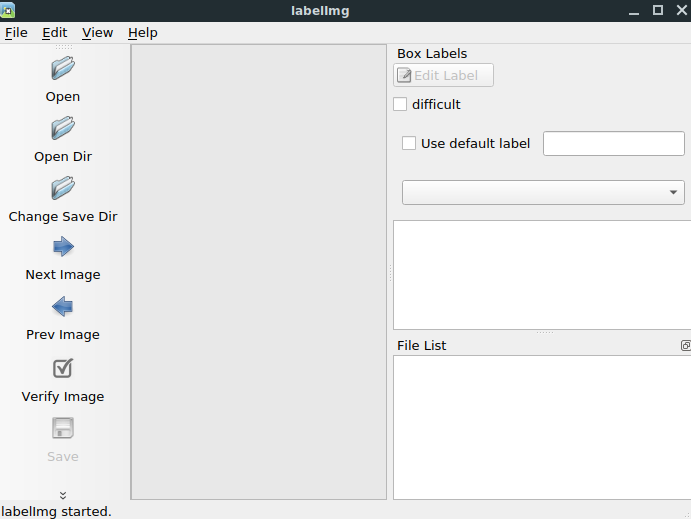

↳ Sol tarafta bulunan Open Dir 'e basınız, ardından verilerin bulunduğu konumu seçiniz ve karşınıza klasörde bulunan görüntü verileri gelecektir.

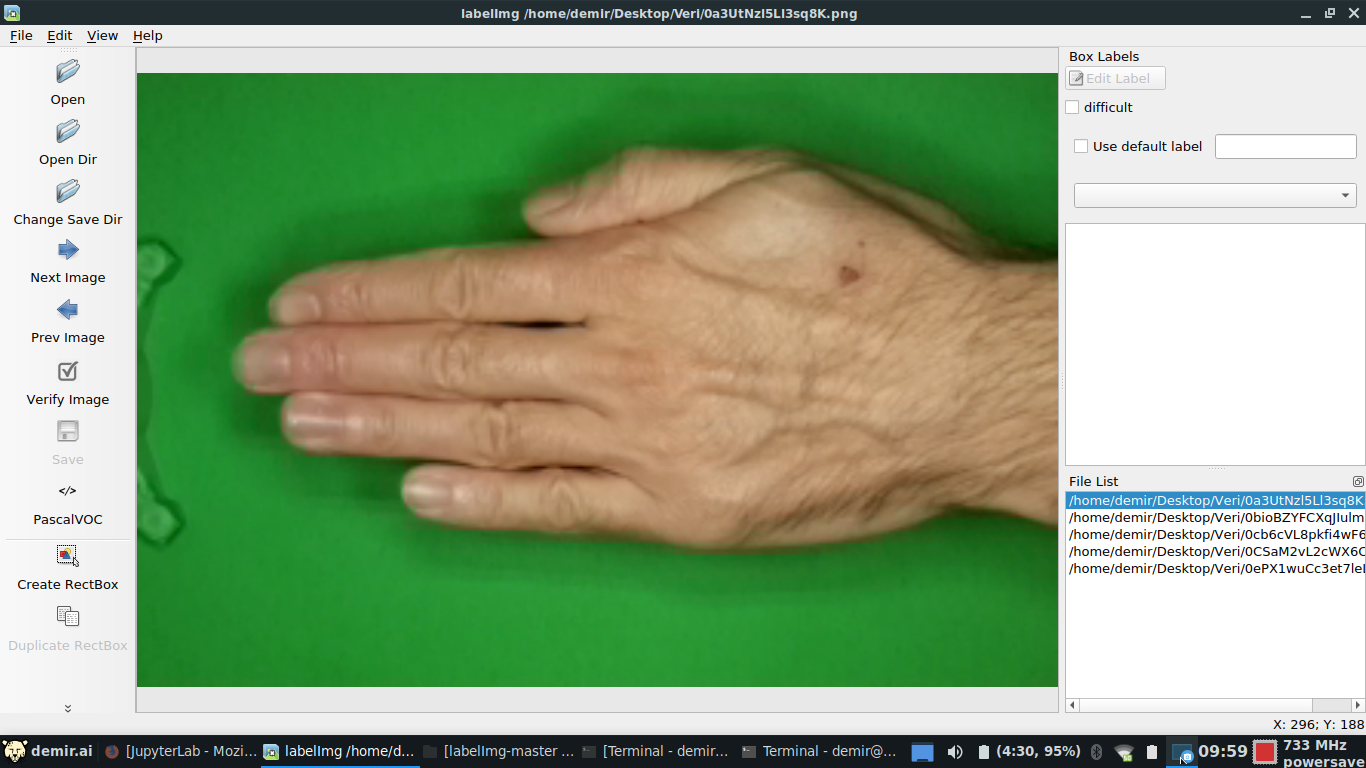

↳ Sol tarafta bulunan PascalVoc 'a tıklarsanız artık etiketler Yolo algoritmasında çalışacak şekilde oluşturulur.

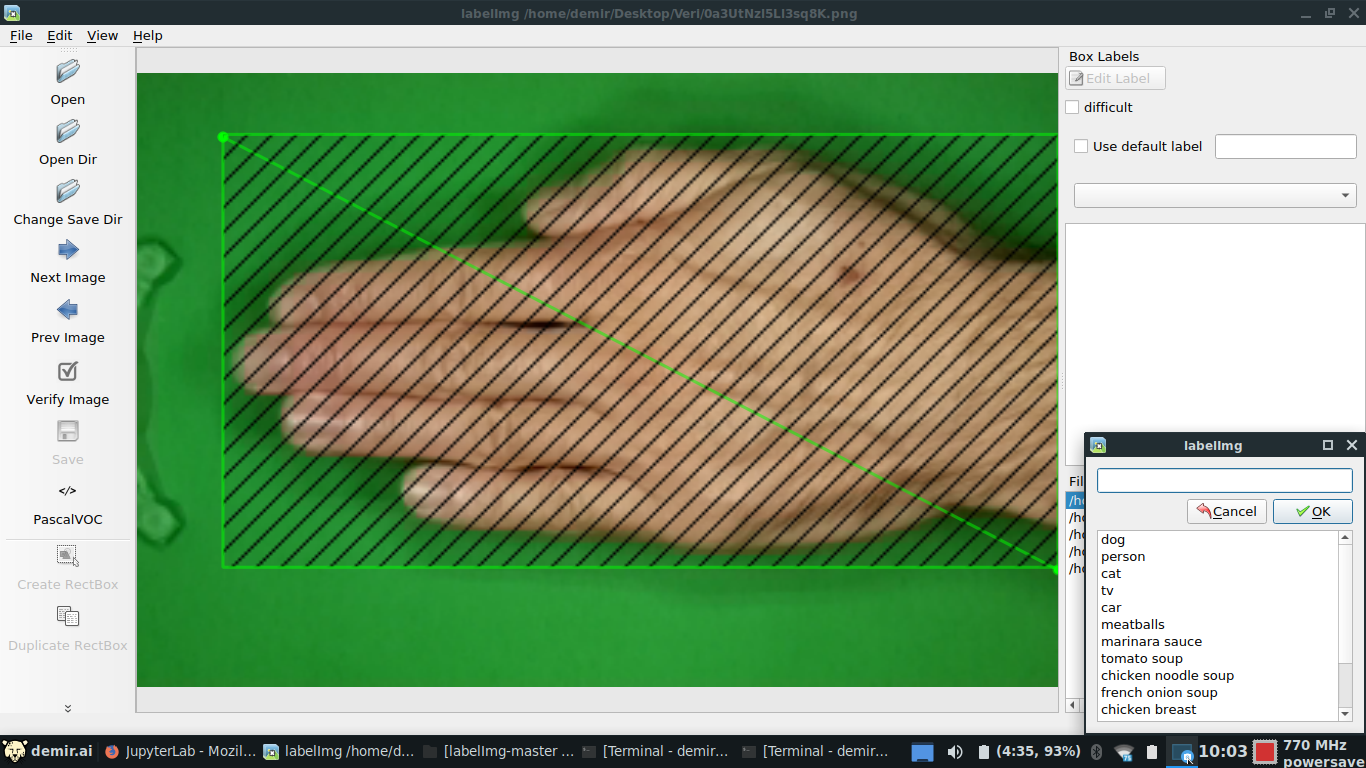
↳ Create RectBox a tıklayınız ardından istediğiniz nesne içinde olacak şekilde bir kare veya dikdörtgen çiziniz.
Sağ aşağıda bulunan labelImg kutusundaki yazı alanına işaretlediğiniz nesnenin etiketini giriniz ve ok a basınız.
Ardından sol tarafta bulunan Change Save Dir e basarak etiketlerin kaydedileceği yolu seçiniz ve Save 'e basarak ilk etiketinizi kaydedin.


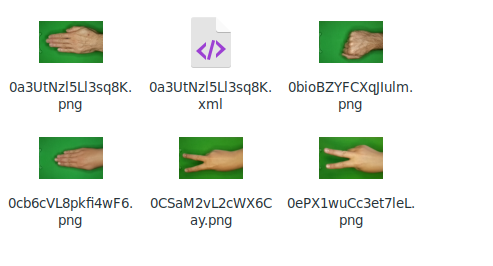

↳ Gördüğünüz gibi veri adı ile aynı olacak şekilde bir xml dosyası oluşturuldu.

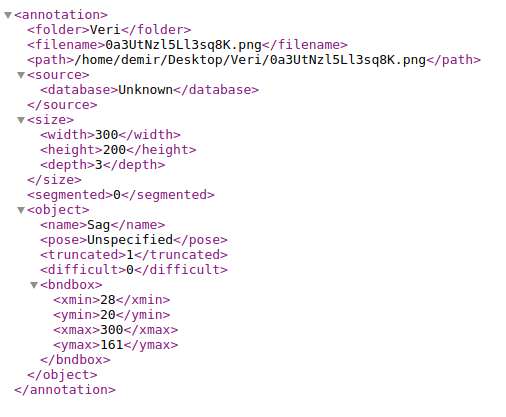

↳ Bu xml dosyası içerisinde, verinin(görüntü) yükseklik ve genişliği, hangi sınıfa ait olduğu ve görüntü içerisindeki nesnenin kordinatlarını(xmin, ymin, xmax, ymax) bulundurur.


* Bu şekilde tüm verilerinizi etiketlemelisiniz. Elinizdeki veri kadar xml dosyası oluşması gerekmektedir, aksi halde bazı görüntü verilerini etiketlemeden atladığınız anlamına gelmektedir. 

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) xml dosyalarını csv dosyasına dönüştürme

Şimdi ise xml dosyalarındaki bilgileri csv dosyasına aktarmamız gerekmekte.
Bunun için Tensorflow_Object_Detection klasörü içerisinde bulunan Veriİşleme klasöründeki xml_to_csv.py python script dosyasını kullanacağız.

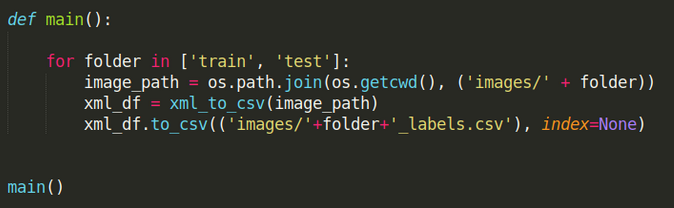

↳ main fonksiyonundaki 'images/' sizin verilerinizin yoludur, eğer verilerinizi sakladığınız klasörün adı farklıysa değiştiriniz. ve bu ... adlı verilerinizi sakladığınız klasörün içersinde iki adet 'test' ve 'train' adlı klasör bulunmalı, bunların içersinde verileriniz ve etiketleriniz(.xml) bulunmalıdır. Sonra terminalden 'python3 xml_to_csv.py' komutunu çalıştırınz, kısa bir süre sonra verilerinizi tanımladığınız klasörün içersinde test ve train klasörlerinin yanında yeni csv dosyalarınış oluşmuş olacaktır.

* Before - Önce

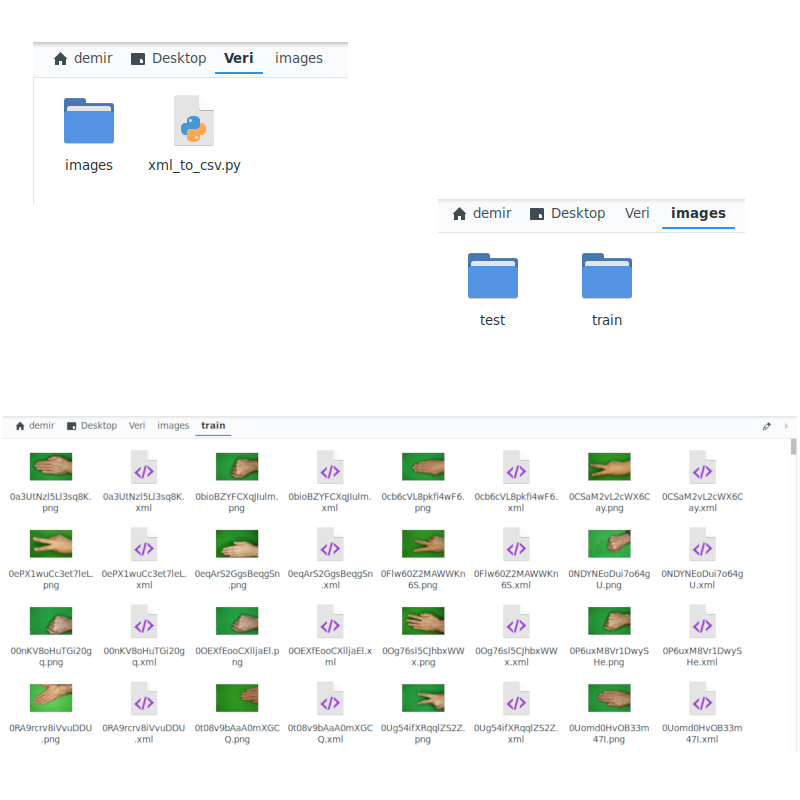

* After - Sonra




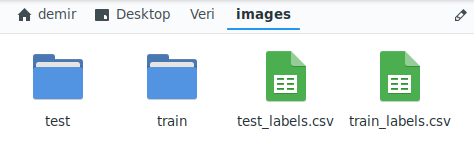

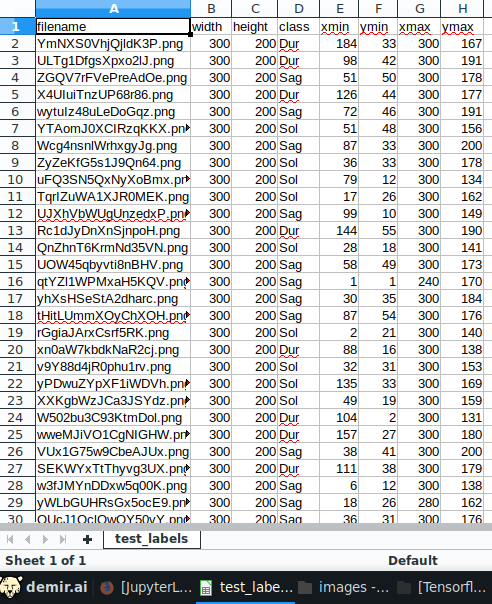

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Eğitim için TFRecords oluşturma

Etiketli görüntülerle, nesne dedektörünün eğitimi için giriş verisi olarak kullanılabilecek TFRecord'lar oluşturmamız gerekir. Bunun için Tensorflow_Object_Detection klasörü içerisinde bulunan Veriİşleme klasöründeki generate_tfrecord.py python script dosyasını kullanacağız.

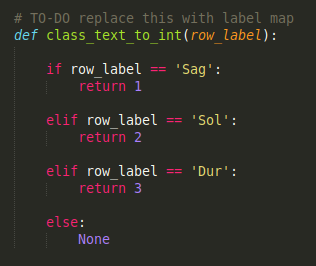

↳ class_tex_to_int adlı fonksiyonu kendi sınıflarınıza göre düzenleyiniz. Her sınıf bir int değer geri döndürmeli.

* 'pip3 install tensorflow-object-detection-api' komutunu çalıştırmalısınız.

### ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) train.record

"python3 generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record" adlı komutu çalıştırınız(Herhangi bir hata almazsanız .record dosyasının konumunu çıktı olarak verir.), Verileri sakladığınız konuma göre düzenlemeler yapınız.

### ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) test.record

"python3 generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record" adlı komutu çalıştırınız(Herhangi bir hata almazsanız .record dosyasının konumunu çıktı olarak verir.), Verileri sakladığınız konuma göre düzenlemeler yapınız.

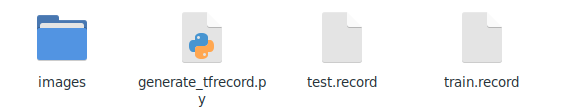

* iki adet .record dosyamız oluştu, train.record 110 mb, test.record 46 mb. Bu .record dosyalarında veriler ve verilerin etiketi bulunmaktadır, modelimiz bu iki dosya ile eğitilecektir.

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* İlk olarak amacımız neyse ona göre model eğitmek için yeterli sayıda veri toplamalıyız.
* Sonra ise toplanan verileri bir araç yardımıyla etiketlemeliyiz.
* Daha sonra ise etiket dosyalarını xml den csv dosyasına dönüştürüp bu csv dosyalararı ve verileri .record dosyası haline getirip eğitim için hazır hale getirdik.
* Artık veriler ile ilgili hiçbir sorunumuz kalmdı, eğitim için hazırlar.

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Nesne Tespiti Teorik Bilgi (Opsiyonel)

Nesne algılama algoritmaları ve sınıflandırma algoritmaları arasındaki fark, algılama algoritmalarında, görüntünün içine yerleştirmek için ilgili nesnenin etrafına bir sınırlayıcı kutu çizme çalışmamızdır. Ayrıca, bir nesne algılama durumunda yalnızca bir sınırlayıcı kutu çizmeniz gerekmeyebilir, görüntüdeki farklı ilgi alanlarını temsil eden çok sayıda sınırlayıcı kutu olabilir ve önceden kaç tane olduğunu bilemezsiniz.

Bu bölümde algoritmalar arasındaki farkları inceleyeceğiz, hızlarını ve doğruluklarını karşılaştıracağız.

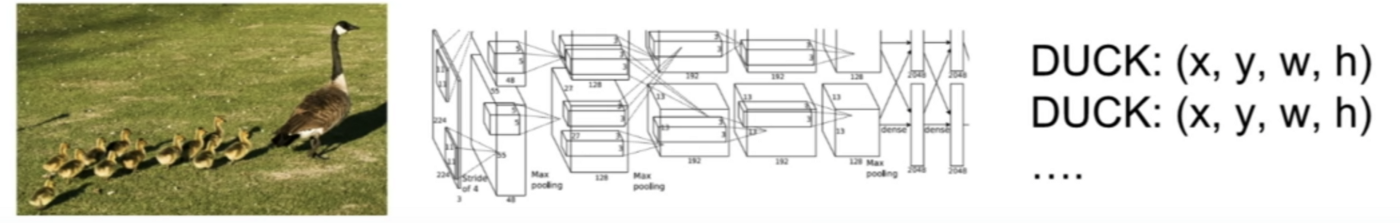

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Nesne Tanıma - Bölge önerisi

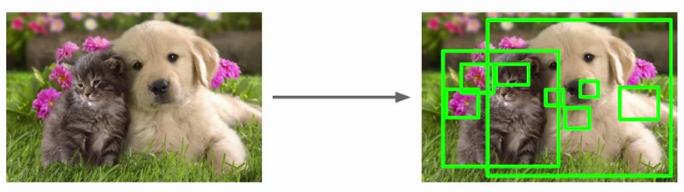

Pencere sol üst köşeden ilerlemeye başlar Kedi, köpek vb. bir nesne tespit edemezse Arka plan olarak işaretler.
Bu işlemi bir pencerede yapmaz farklı farklı boyutlarda çok sayıda pencere ile tarama yapar.
Nesne bulunma olasılığı olan bölgeler belirleniyor. 2000 civarında öneri bir kaç saniye içersinde yapılır.
Bölge önerisi yapılırken yapay zeka kullanılmaz, geleneksel resim işleme algoritmaları kullanılır(renk ve köşe ayrıtları vb. durumlara göre nesne tespit edilir.).

![fds](https://www.pyimagesearch.com/wp-content/uploads/2014/10/sliding_window_example.gif)
![dsa](https://www.pyimagesearch.com/wp-content/uploads/2020/06/keras_classifier_object_detector_result02_update-768x768.png)

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Region-Based Conolutional Nerual Network (R-CNN)

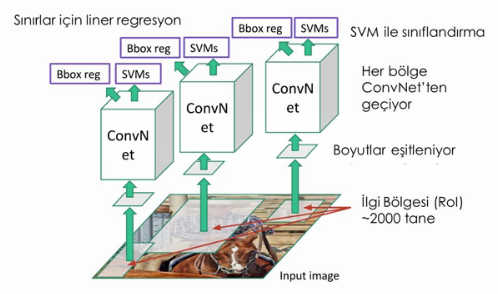

* Bölge önerisi kullanılır. 2000 e yakın bölge tespit edilir.

* Bu bölgelerin boyutları eşitlenir ve CNN ağından geçirilir. Her bölge Convret 'ten geçer.

* SVM ile sınıflandırma yapılır (Gözetimli öğrenme kullanan makine öğrenmesi)
  
  SVM(Destek vektör makinesi) : Destek vektör makinesi, eğitim verilerindeki herhangi bir noktadan en uzak olan iki sınıf arasında bir karar sınırı bulan vektör uzayı tabanlı makine öğrenme yöntemi olarak tanımlanabilir.

* Sınıflar için linear regrasyon (Bir veya birden fazla bağımsız değişken ile başka bir bağımlı değişken arasındaki bağlantıyı moddelemek için kullanılan yöntem.) kullanırız.

* Eğitim aşaması :
 
  1-) Softmax sınıflandırıcı ile ağ eğitimi (Log loss)
  
  2-) SVM eğitimi (Hinge loss)
  
  3-) Sınırlayıcı eğitimi (least squares)


## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Fast R-CNN

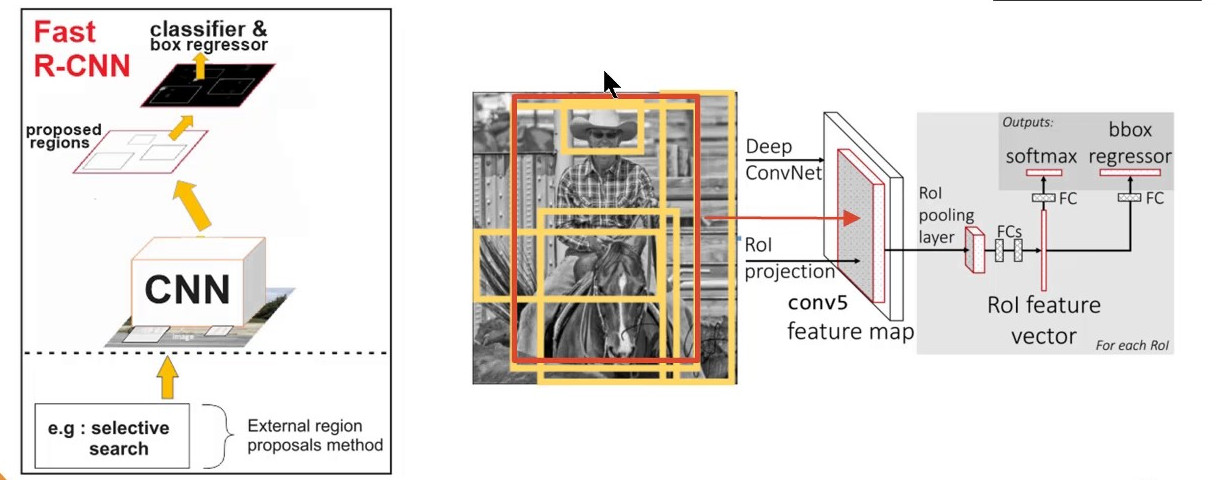


* Resmi ConvNet ağından geçirip özellik haritası çıkartırız.

* Selective Sercah ile 2000 e yakın bölge belirleriz.

* Artık her bölgeyi CNN den geçirmiyoruz, Buda bize hız kazandırır.

* Özelliklerde boyut eşitlemesi yaparız. (Rol Pooling)
    
* Sınıflandırma yapılır. (Softmax sınıflandırıcı)


## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Faster R-CNN

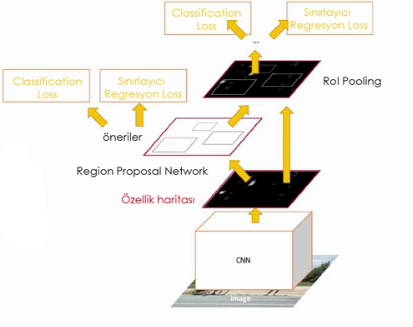


* Resmi ConvNet ağından geçirip özellik haritası çıkartırız.

* Ayrı bir bölge önerisi ağı oluştururuz ve bu bölgeleri bu ağda tespit ederiz.

* Tespit işleminden sonra Fast R-CNN ile aynı işleme devam eder.

* Bölge önerisi bulma yolumuzdaki farklılıktan dolayı hız kazanırız.

* iki Ağ eğitiriz (ConvNet, Bölge önerisi ağı)

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Single Shot Multibox Detecton (SSD)

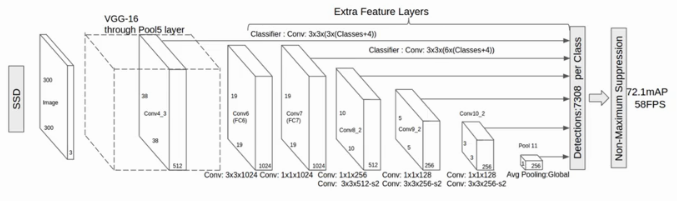


* Tek seferde nesne tanıma yapar

* Resim CNN den geçirilir. Farklı boyutlarda özellik haritaları çıkartılır.

* 3x3 filitre ile az miktarda dikdörtgensel sınırlar tespit ederiz. Bu işlemde hem sınırlar hemde sınıflandırmalar belli olur.

* Eğitim esnasında doğru olan sınırlar ve tahmin olan sınırlar karşılaştırılır, en iyi tahmini yapan ve 0.5 oranının üstündeki dikdörtgenleri pozitif olarak işaretler

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Mask R-CNN

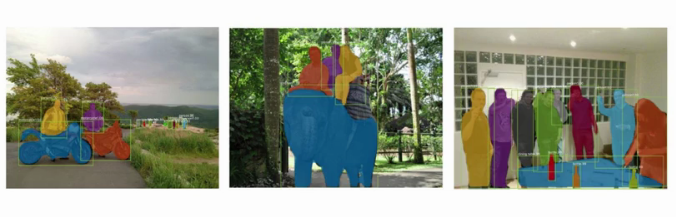


* Amaç resim içindeki nesneyi tespit edip tüm pixellerine ulaşmak.

* Temelinde Faster R-CNN vardır.

* Mask R-CNN de maskelemek için farklı bir dal vardır.

* Maske olan pixeller 1 ile maske olmayan pixeller 0 ile işaretlenir ve bir matris elde ederiz.

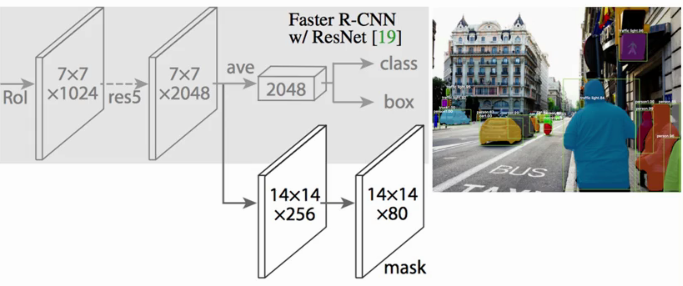

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) YOLO

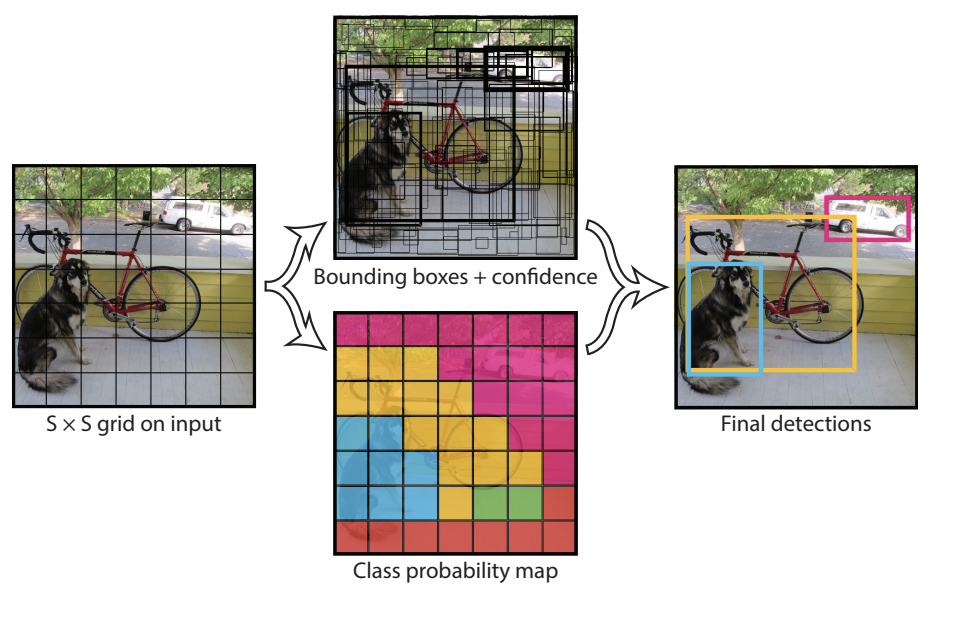

Bir resmi SxS ızgaralara bölelim, her ızgara içinde m sınırlayıcı kutu alırız. Sınırlayıcı kutunun her biri için ağ sınırlayıcı, kutu için bir sınıf olasılığı ve ofset değerleri verir. Eşik değerinin üzerinde sınıf olasılığına sahip sınırlayıcı kutular seçilir ve görüntü içindeki nesneyi bulmak için kullanılır.

YOLO, diğer nesne algılama algoritmalarından daha hızlı büyüklük sıralamasına sahiptir (saniyede 45 kare). YOLO algoritmasının sınırlaması, görüntüdeki küçük nesnelerle mücadele etmesidir, örneğin bir kuş sürüsünü tespit etmede zorluk yaşayabilir. Bunun nedeni algoritmanın mekansal kısıtlamalarıdır.

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* Anlattığım algoritmaların coco veri seti ile eğitilmiş modellerini bu linkten inceleyebilirsiniz :  https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md


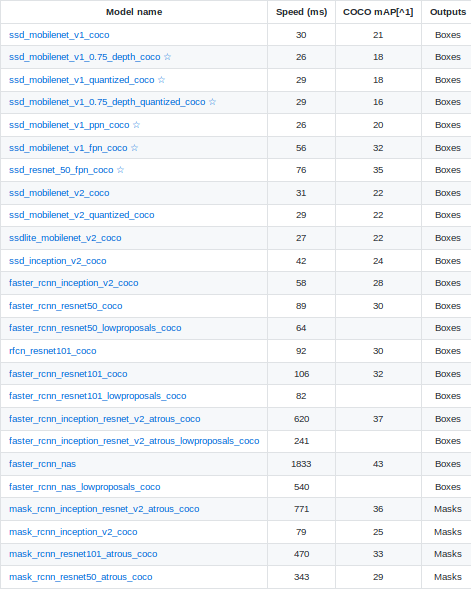 (Modellerin hızı ve doğruluğu)

* Doğruluk önemliyse Faster R-CNN, hız önemliyse SSD MobileNet

* Biz bu projemizde faster_rcnn_inception_v2_coco 'yu kullanacağız, o halde modeli indirelim.

![ezgif.com-video-to-gif.gif](https://cdn-images-1.medium.com/max/600/1*enOf0BEuyn_YDdFWKp86Uw.gif)

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Eğitimi Yapılandırma

* Eğitimden önce yapmamız gereken son şey, bir etiket haritası ve bir eğitim yapılandırma dosyası oluşturmaktır.

* Terminal ile Tensorflow_Object_Detection klasörü içindeki research klasörüne gidiniz, ardından "python3 setup.py build" komutunu çalıştırınız. Daha sonra "python3 setup.py install" komutunu çalıştırınız.(Hata alırsanız başına sudo ekleyiniz. örn: sudo python3 setup.py build)


## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Etiket haritası oluşturma

* Bu işlemlerden sonra aynı terminalden "cd object_detection/training" komutunu çalıştırıp bu dizine ilerleyiniz.

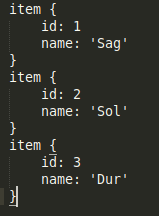

* ↳ Klasörün içinde bulunan labelmap.pbtxt adlı dosyayı kendi ID ve etiketlerinize göre düzenleyiniz.

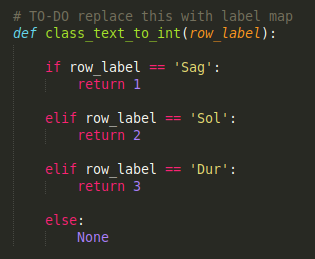

* ↳ generate_tfrecord.py adlı script dosyasında yazdığınız şekilde yazınız.

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Eğitim yapılandırması oluşturma

Şimdi bir eğitim yapılandırma dosyası oluşturmamız gerekiyor. Seçim modelim olarak, diğer birçok modelden daha doğruluk oranı olan "faster_rcnn_inception_v2_coco" kullanacağız.

* https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md Linkten istediğiniz modeli indiriniz.

* İndirdiğimiz modeli arşivden çıkartın ve klasörü "../Tensorflow_Object_Detection/research/object_detection" konumuna kopyalayınız.

* test.record ve train.record dosyalarını "../Tensorflow_Object_Detection/research/object_detection" konumuna kopyalayınız.

"../Tensorflow_Object_Detection/research/object_detection/samples/configs/" konumundan seçtiğiniz modelin .config dosyasını bulunuz(Hepsi burada mevcuttur). Daha sonra bu dosyayı "../Tensorflow_Object_Detection/research/object_detection/training/" konumuna kopyalayınız.

* Eğer sizde "faster_rcnn_inception_v2_coco" modelini kullanıyorsanız "faster_rcnn_inception_v2_pets.config" dosyasını kopyalamanız gerekli.

### ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) Şimdi bu .config dosyasını düzenleyelim :

* Class - 9. satırdaki num_classes değişkenine kaç sınıf sayınız varsa sayısını yazınız(Bizde 3 sınıf mevcut.)

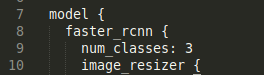

* Model - 106. satırdaki fine_tune_checkpoint kısmına modelin konumunu yazınız ("/home/demir/Desktop/Tensorflow_Object_Detection/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt")

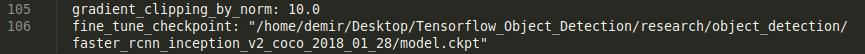

* Train - 123. satıra eğitim dosyamızın yani train.record 'un konumunu yazınız. (/home/demir/Desktop/Tensorflow_Object_Detection/research/object_detection/train.record) 125. satıra oluşturduğumuz labelmap.pbtxt 'in konumunu yazınız(/home/demir/Desktop/Tensorflow_Object_Detection/research/object_detection/training/labelmap.pbtxt).

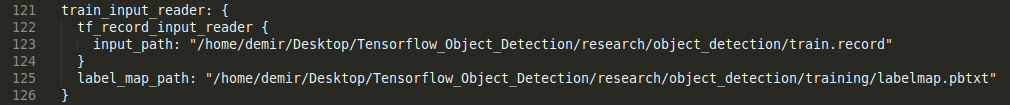

* Test - 135. satıra test dosyamızın yani test.record 'un konumunu yazınız. (/home/demir/Desktop/Tensorflow_Object_Detection/research/object_detection/test.record) 137. satıra oluşturduğumuz labelmap.pbtxt 'in konumunu yazınız(/home/demir/Desktop/Tensorflow_Object_Detection/research/object_detection/training/labelmap.pbtxt).

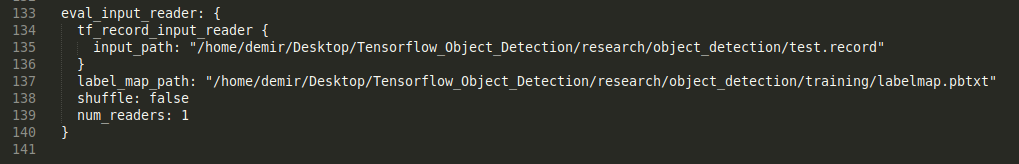

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* İlk olarak bir etiket haritası oluşturmalıyız

* Sonra ise istediğimiz modeli indirip .record dosyaları ile birlikte "../Tensorflow_Object_Detection/research/object_detection" konumuna kopyalayınız.

* Daha sonra modele uygun .config dosyasını seçip düzenlemeler yaparız, artık eğitime hazırız :)

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Modeli Eğitme

* Öncelikle yeni bir terminal açınız. 'export PYTHONPATH="$PYTHONPATH:/home/demir/Desktop/Tensorflow_Object_Detection/research/:/home/demir/Desktop/Tensorflow_Object_Detection/research/slim"' komutunu çalıştırarak path atınız, atacağınız path sizde değişkenlik gösterebilir, kendi dizininize göre ayarlayınız.

* Path :(Erişim Yolu), her işletim sisteminin kendine özgü olarak kullandığı işletim sisteminden hedef dosyaya kadar varan yol haritasıdır. Path sayesinde bilgisayar içerisindeki dosyaların tümünün eşsiz olması sağlandığı gibi aynı zamanda dosyaların tam yerlerinin de bilinmesi mümkündür.

* sonra "../Tensorflow_Object_Detection/research/" konumuna ilerleyiniz. Sırasıyla "python3 setup.py build" ve "python3 setup.py install" komutlarını çalıştırınız.

* Modeli eğitirken TensorFlow 1.15.0-GPU versionunu kullanacağız. İsterseniz TensorFlow 2.2.0-GPU versionunu kullanabilirsiniz.

* Daha sonra "cd object_detection" komutu ile object_detection klasörüne ilerleyiniz. aşağıdaki TensorFlow sürümlerinden hangisi size uygunsa komutu bu dizinde çalıştırınız.

* TF 1.15.0-GPU : python3 model_main.py --logtostderr --model_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

* TF 2.2.0-GPU : python3 model_main_tf2.py --logtostderr --model_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_pets.config

* Kendi versionunuza göre komutu çalıştırın ve eğitimi başlatın. (Eğitimi Masaüstü bilgisayarımda(GPU : Nvidia GTX 1060 6GB, CPU : AMD Ryzen5 1600) 4 Saat boyunca sürdürdüm.)

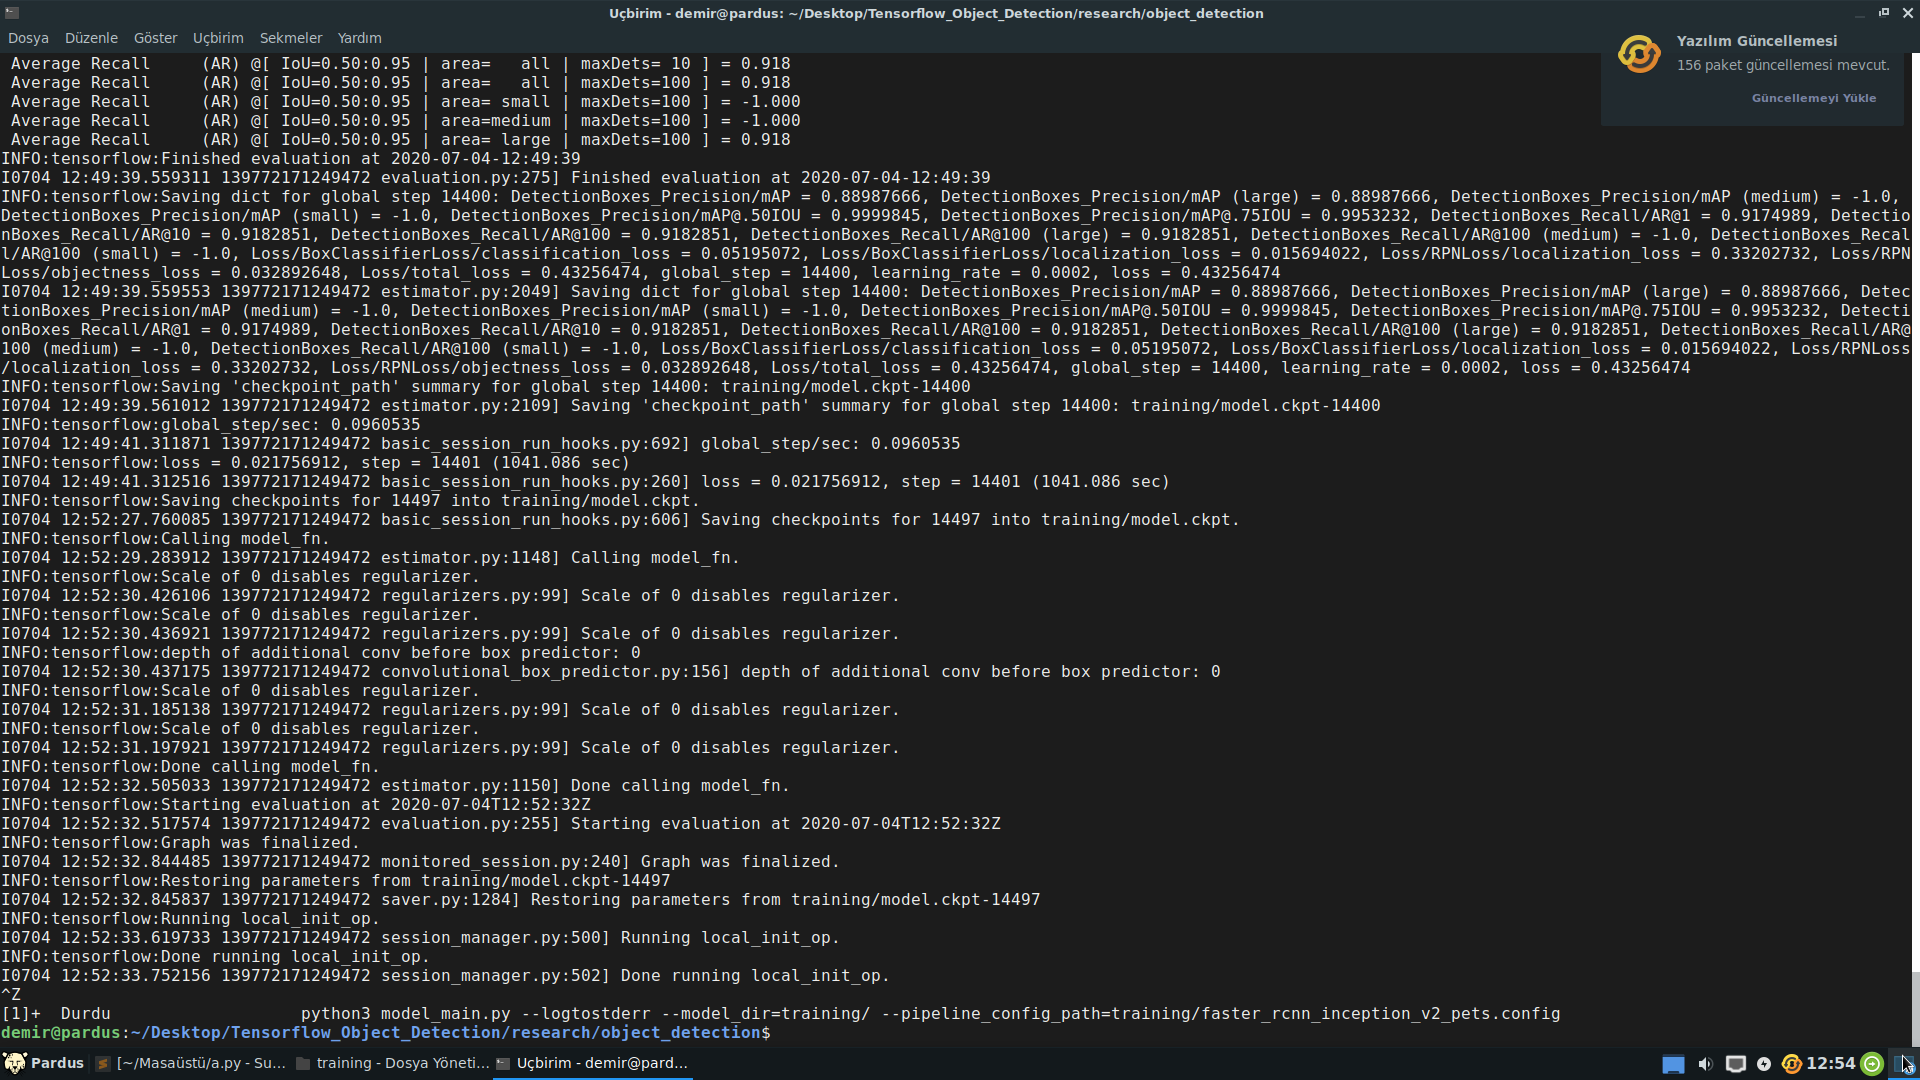

* Eğitim devam ederken kaybı(loss) inceleyebilirsiniz veya TensorBoard ile daha detaylı inceleme ve gözlememe yapabilirsiniz.(Katmanlar, kayıp, doğruluk , vb..)

* İstediğiniz vakitte "CTRL+Z" kombinasyonu ile eğitimi sonlandırabilirsiniz, tekrar çalıştırdığınızda eğitim kaldığı yerden devam eder.

* "../Tensorflow_Object_Detection/research/object_detection/training/" konumuna eğitim devam ederken ağırlıklar kaydedilir.

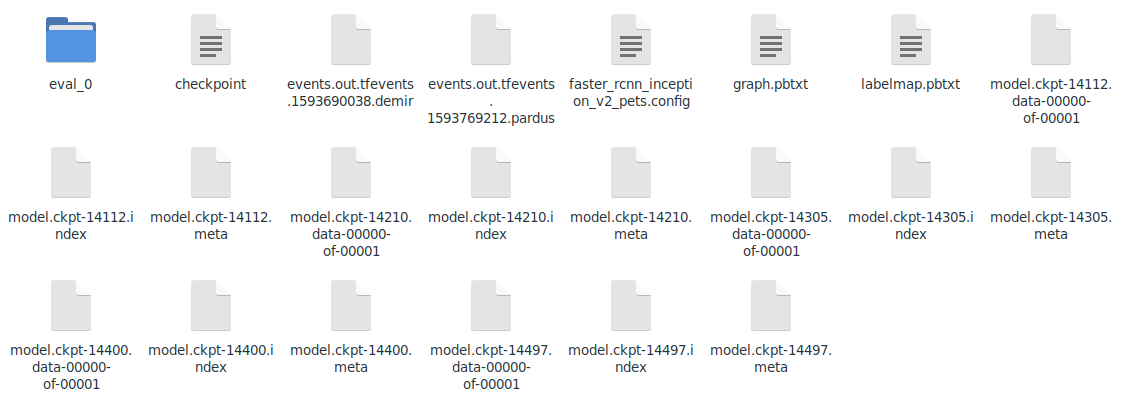

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) TensorBoard

* TensorBoard, makine öğrenimi deneyleri için gereken görselleştirme ve araçları sağlar:

    * Kayıp ve doğruluk gibi metrikleri izleme ve görselleştirme
    * Model grafiğini görselleştirme (ops ve katmanlar)
    * ağırlıkların, önyargıların veya diğer tensörlerin histogramlarını görüntüleme
    * Görüntüleri, metinleri ve ses verilerini görüntüleme
    
    Ve daha fazlası
    
    


* "../Tensorflow_Object_Detection/research/object_detection" konumunda iken "tensorboard --logdir=training" komutunu çalıştırınız. logdir==ağırlıkların_kaydedildiği_yer kendi dizininize göre düzenleyiniz.

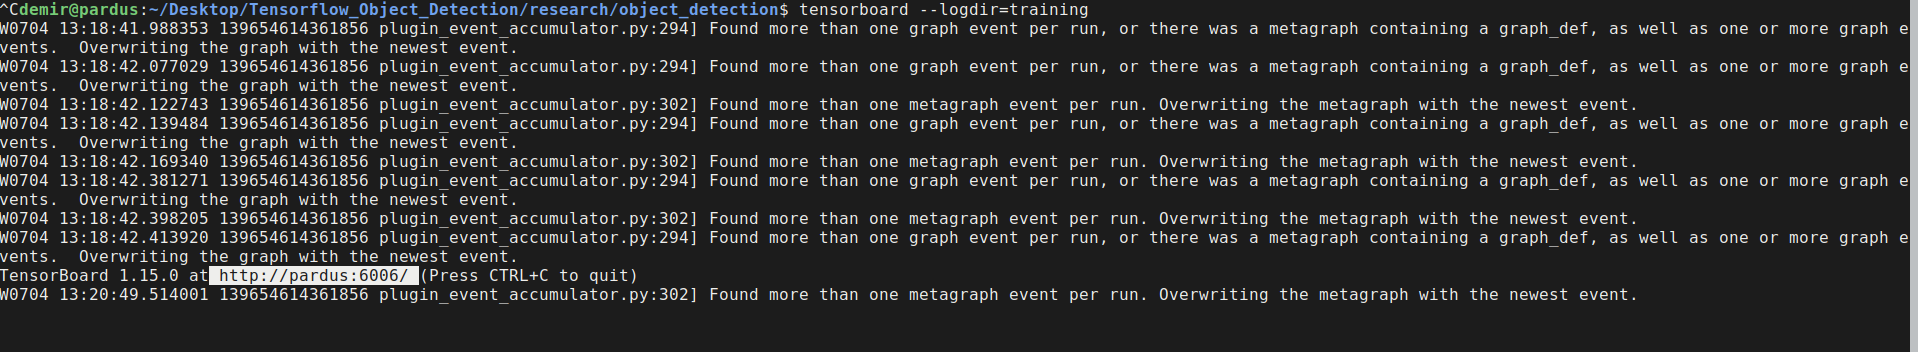

* Ardından size bir adres verecekir, o adresi tarayıcınızdan çalıştırınız ve TensorBoard ile eğitiminizi detaylıca gözlemleyebilirsiniz.

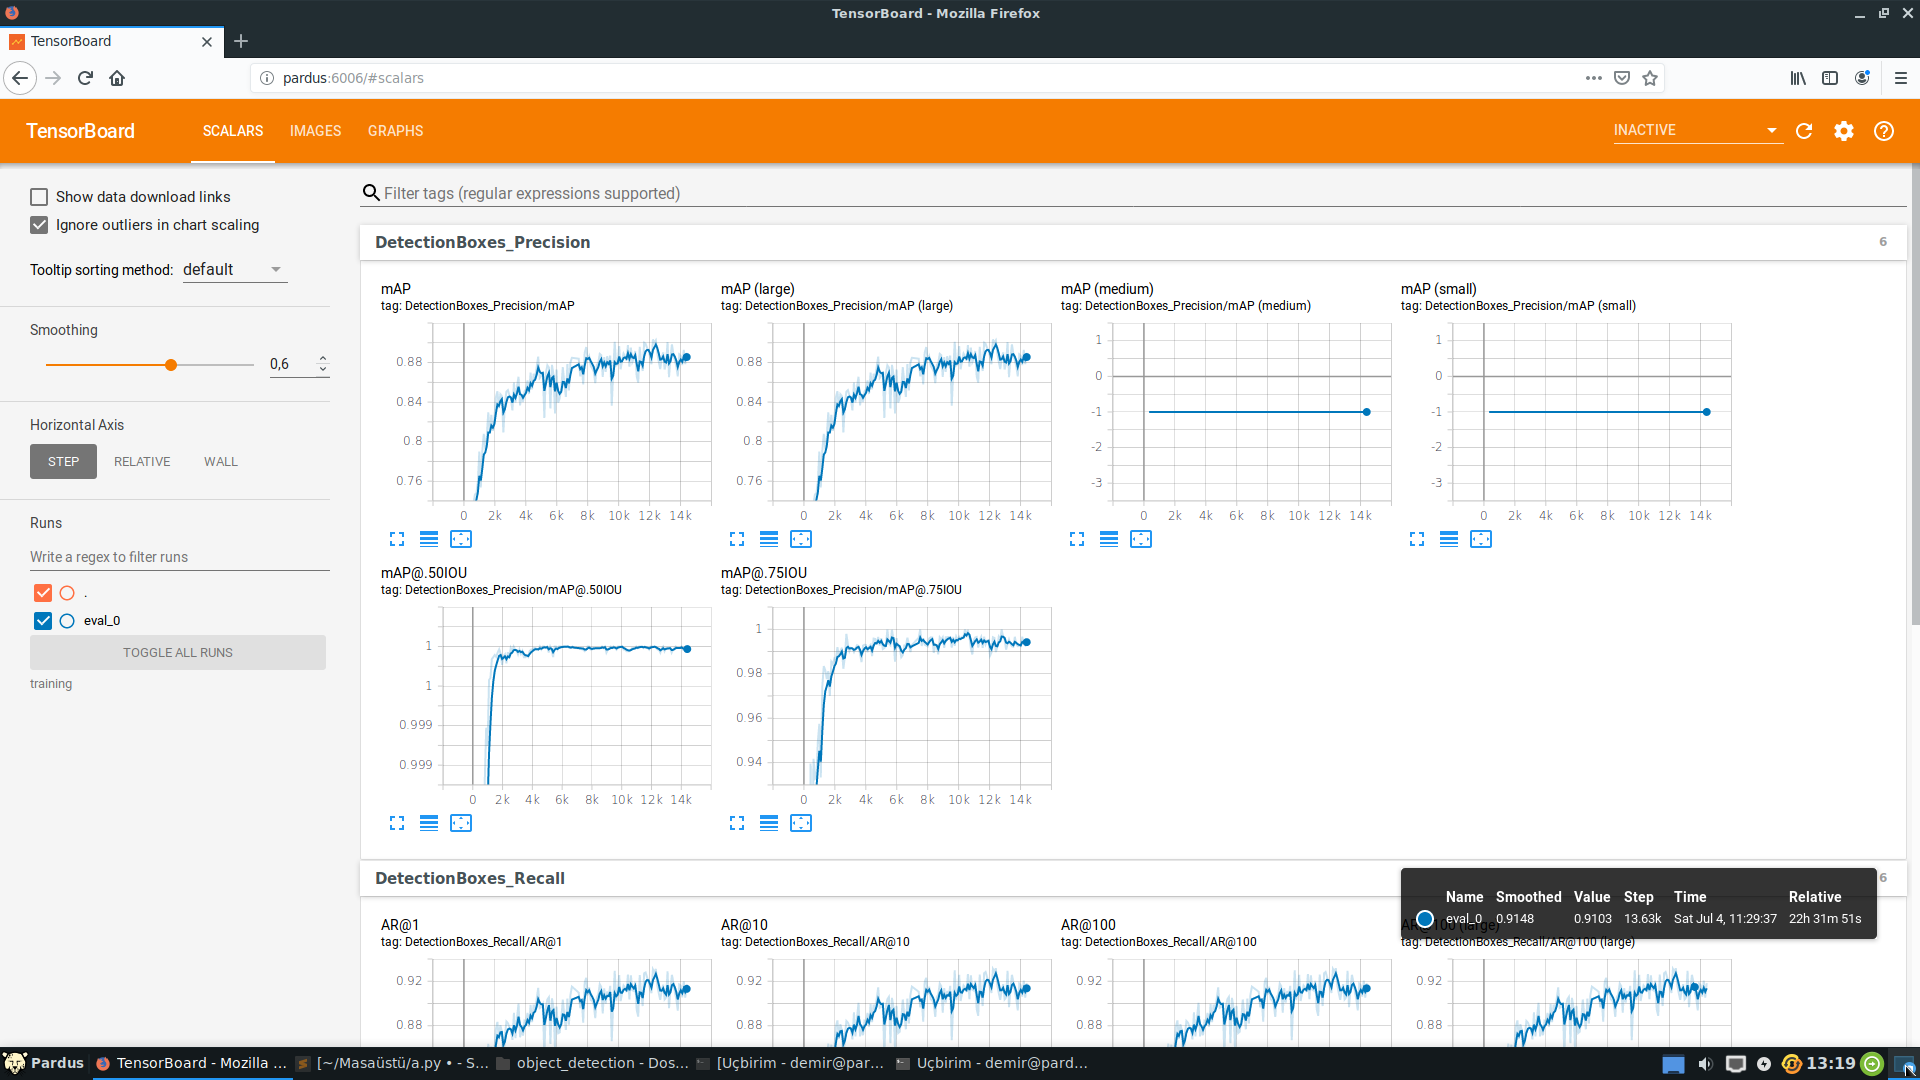

↳ Metrikleri gözlemleme

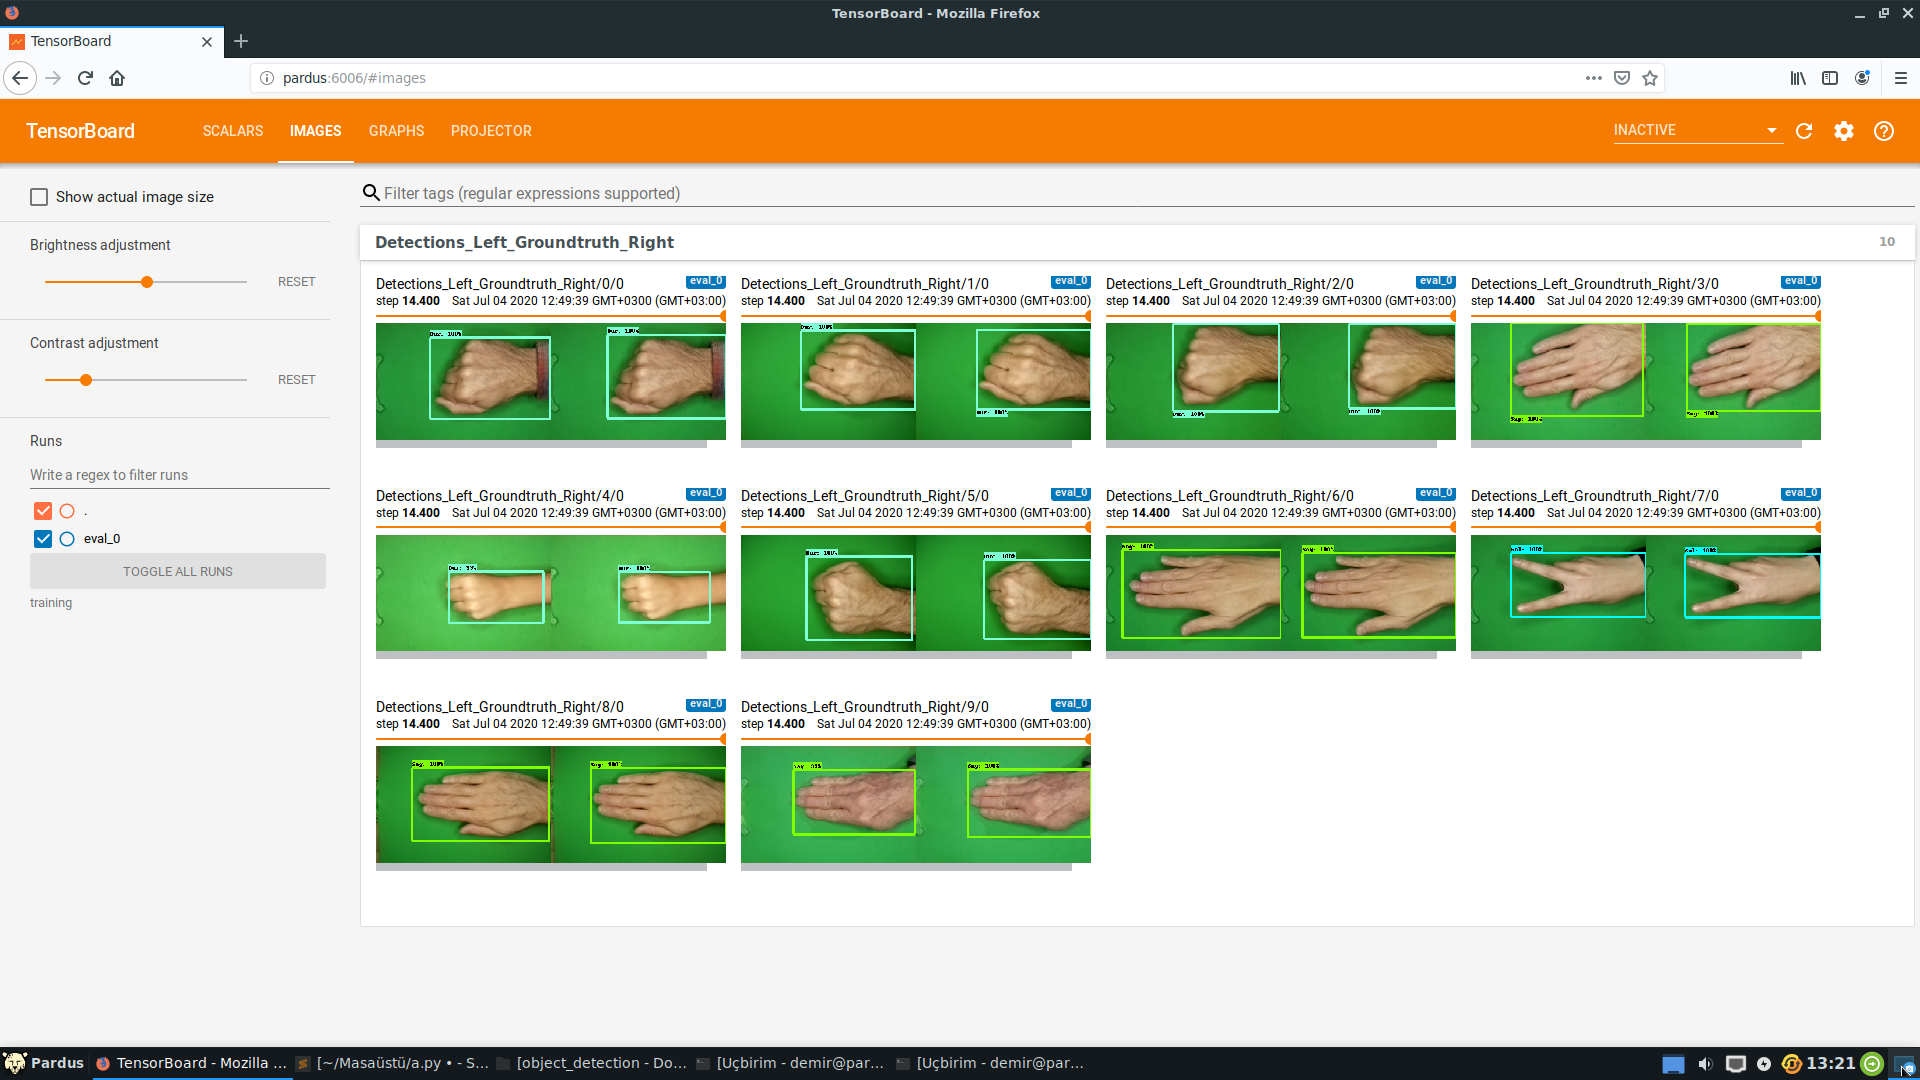

↳ Görüntü verileri

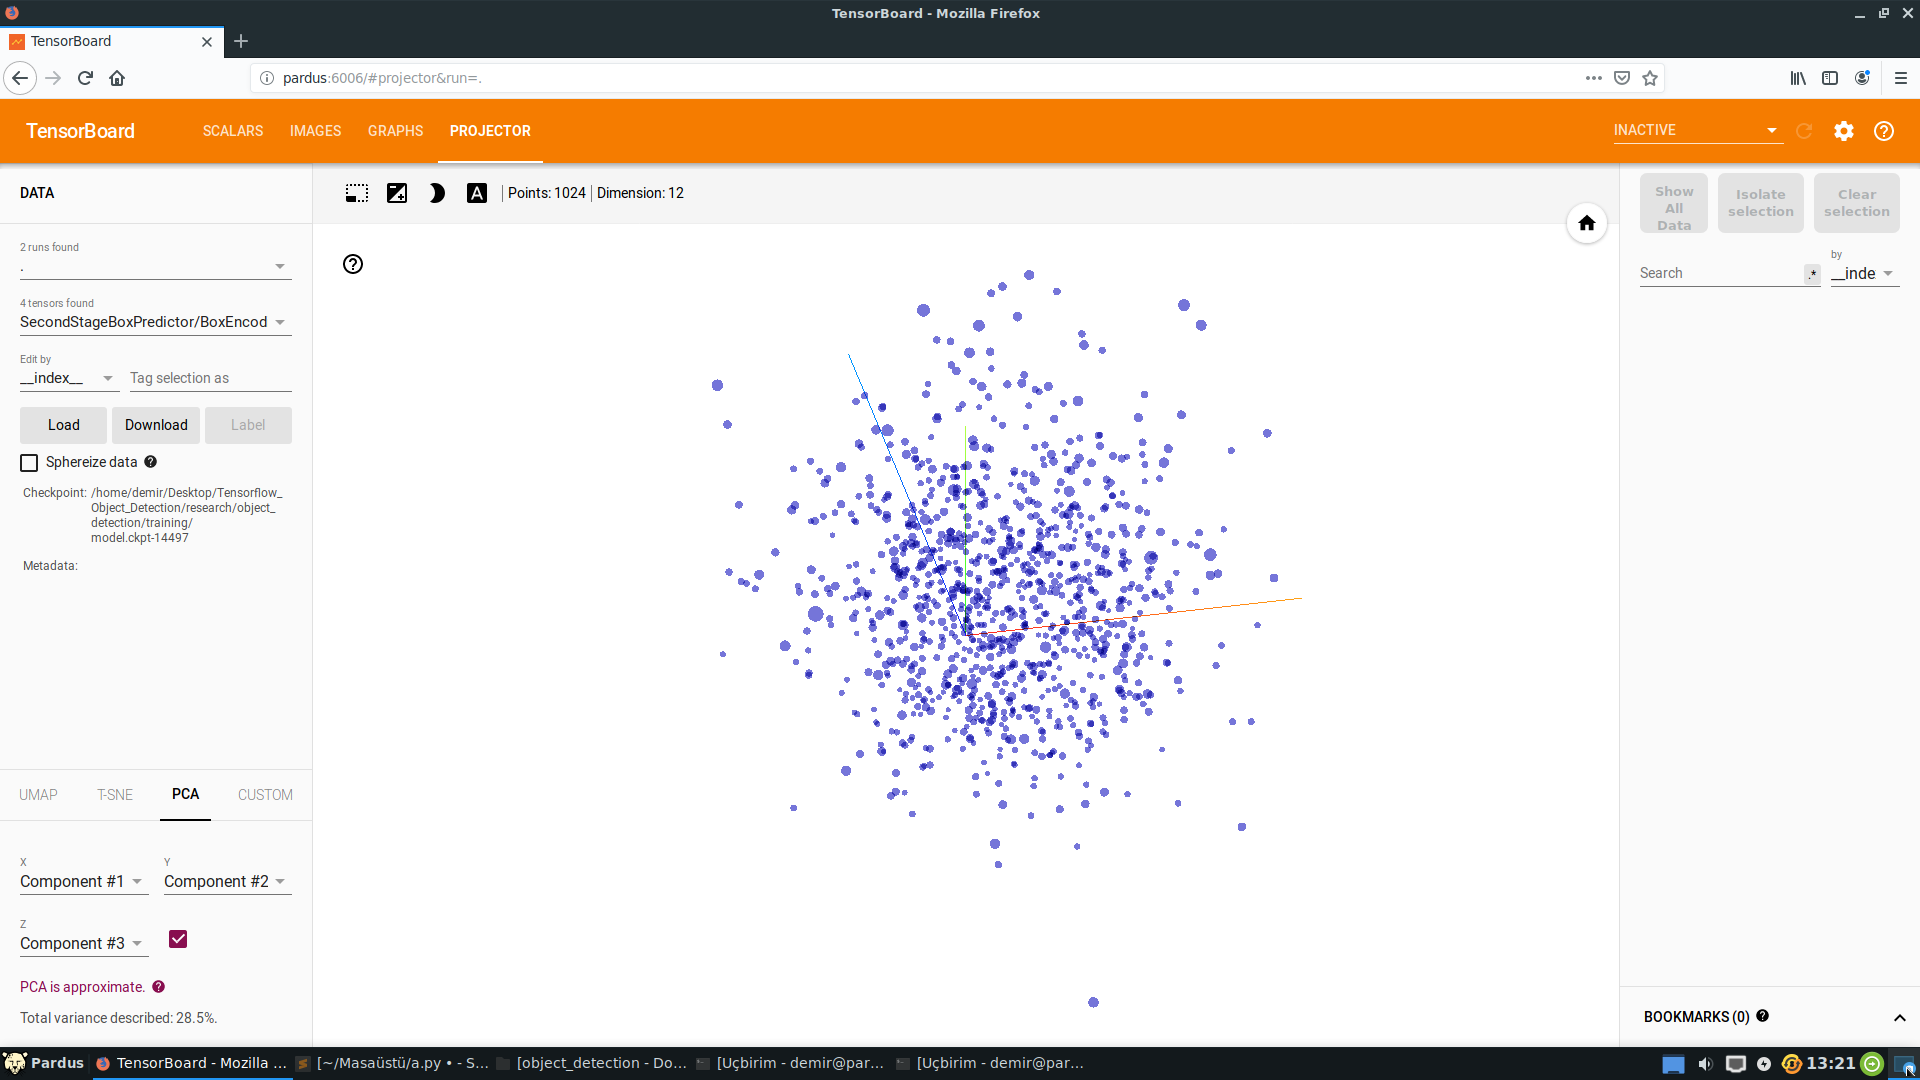

↳ 3B etkileşimli görüntüleme

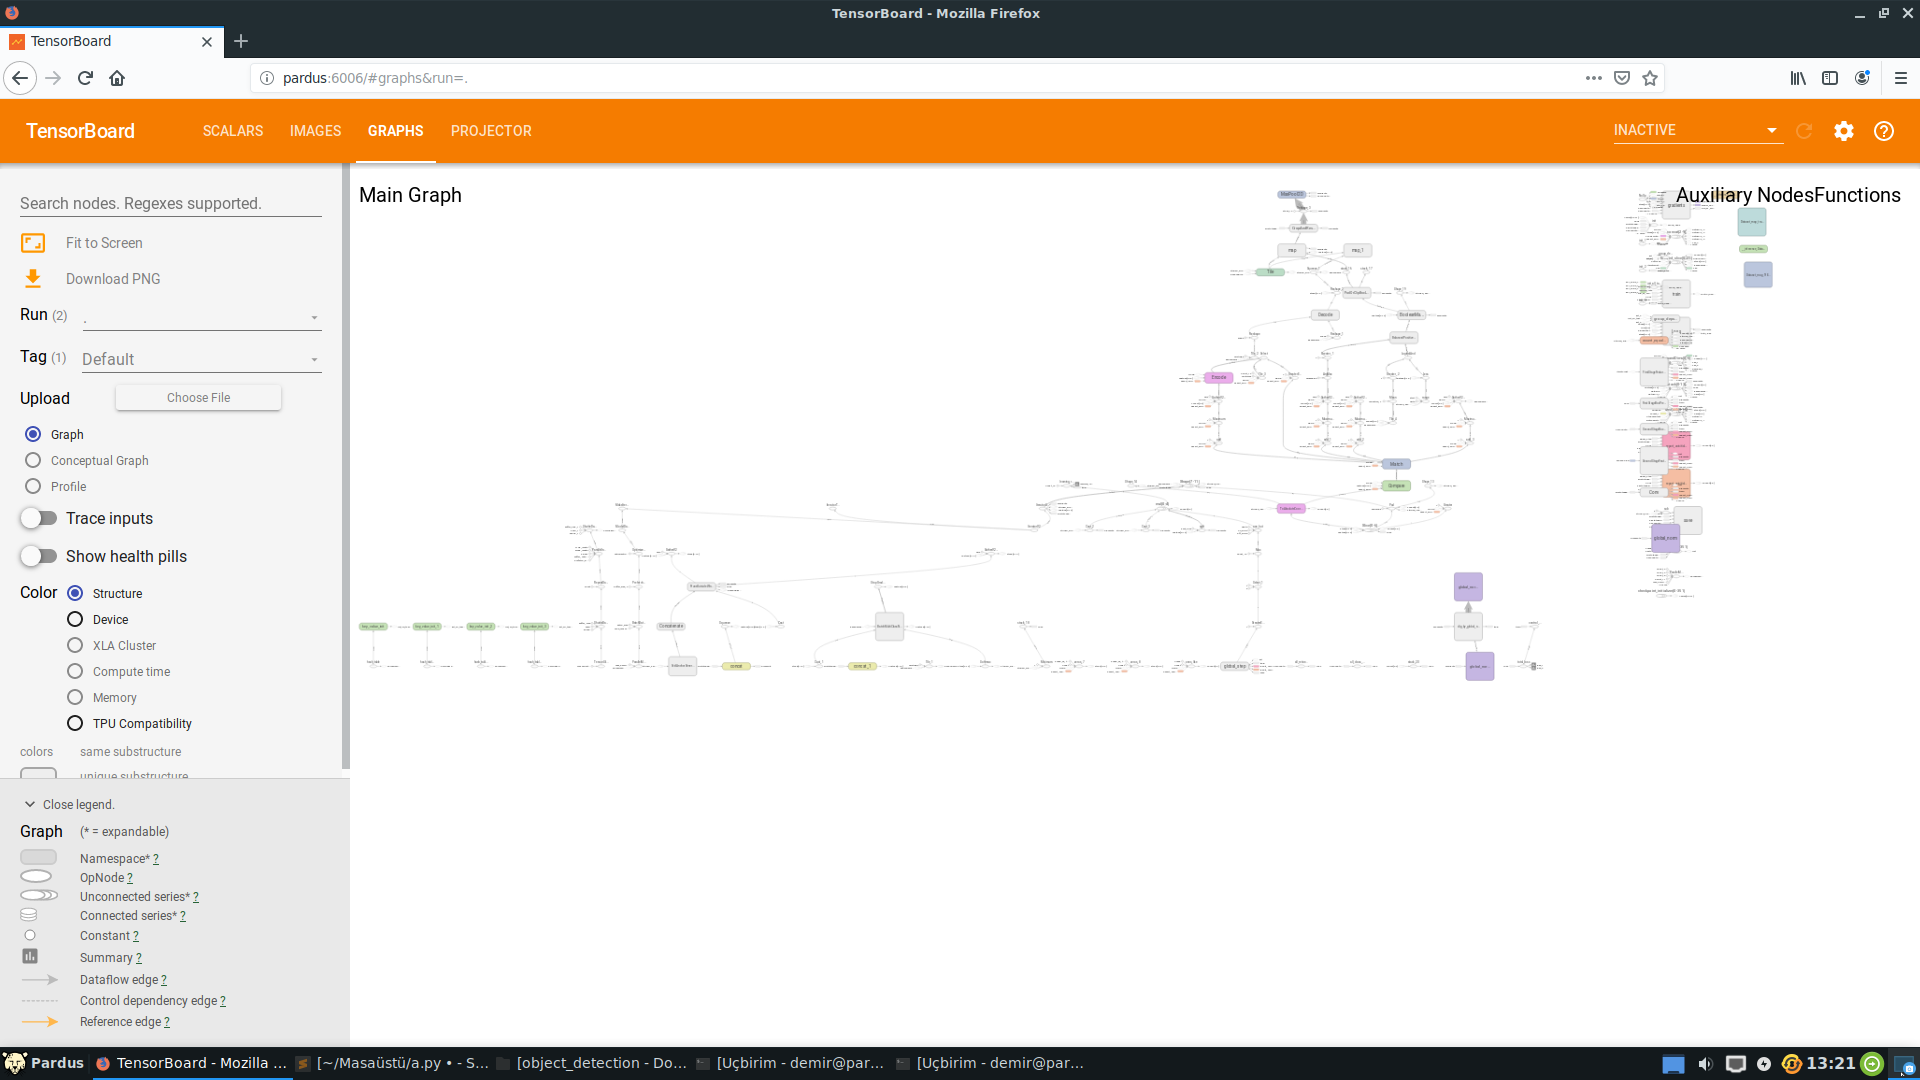

↳ Çizge görselleştirme

* Daha fazla bilgi için https://www.tensorflow.org/tensorboard adresini ziyaret ediniz.

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* Öncelikle yeni bir terminal açınız. 'export PYTHONPATH="$PYTHONPATH:/home/demir/Desktop/Tensorflow_Object_Detection/research/:/home/demir/Desktop/Tensorflow_Object_Detection/research/slim"' komutunu çalıştırarak path atınız, atacağınız path sizde değişkenlik gösterebilir, kendi dizininize göre ayarlayınız.

* Daha sonra "..../" konumunda iken sırasıyla "python3 setup.py build" ve "python3 setup.py install" komutlarını çalıştırınız.

* Size uygun olan Tensorflow sürümü ile eğitimi başlatınız, istediğiniz vakitte ctrl+z kombinasyonu ile çıkınız.

* Eğitim devam ederken TensorBoard yardımı ile modeli daha detaylı inceleyebilirsiniz.

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Çıkarım Grafiğini Dışa Aktarma

* Yeni bir terminal açınız ve tekrardan aynı konuma path atınız 'export PYTHONPATH="$PYTHONPATH:/home/demir/Desktop/Tensorflow_Object_Detection/research/:/home/demir/Desktop/Tensorflow_Object_Detection/research/slim" '

* Ardından "../Tensorflow_Object_Detection/research/object_detection/" konumuna ilerleyip "python3 export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-XXXX --output_directory inference_graph" komutunu çalıştırınız.
* training/model.ckpt-XXX, sizde eğitim kaçıncı iterasyonda ise klasörden bakıp yazınız

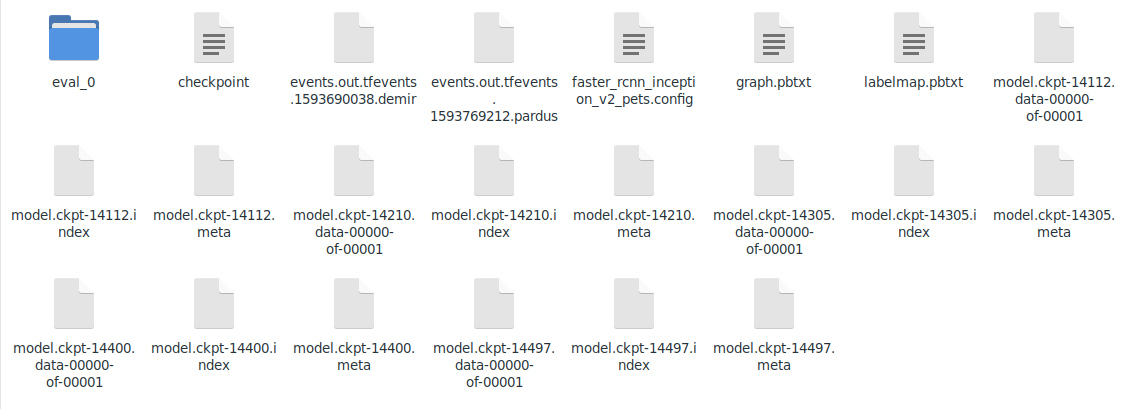

* ↳ Bende iterasyon sayısı 14497 yani çalıştıracağım komut "python3 export_inference_graph.py --input_type image_tensor --pipeline_config_path training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix training/model.ckpt-14497 --output_directory inference_graph" olacak

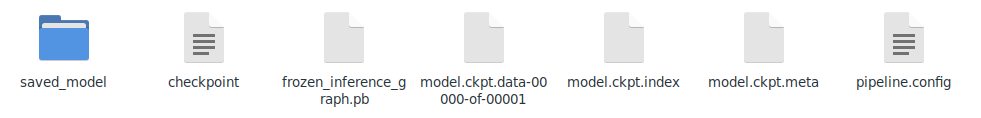

* ↳ "../Tensorflow_Object_Detection/research/object_detection/inference_graph/" konumuna modelimizin derlenmiş ağırlıkları eklenir.

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) TEST

* Yeni bir terminal açınız ve tekrardan aynı konuma path atınız 'export PYTHONPATH="$PYTHONPATH:/home/demir/Desktop/Tensorflow_Object_Detection/research/:/home/demir/Desktop/Tensorflow_Object_Detection/research/slim" '

* "../Tensorflow_Object_Detection/research/object_detection/" konumuna ilerleyiniz

* "Python3 test_images.py" komutunu çalıştırarak "../Tensorflow_Object_Detection/research/object_detection/test_images/" konumundaki üç resim üzerinde nesne tespiti yapar. Çıktılarını aynı konuma oluşturur.

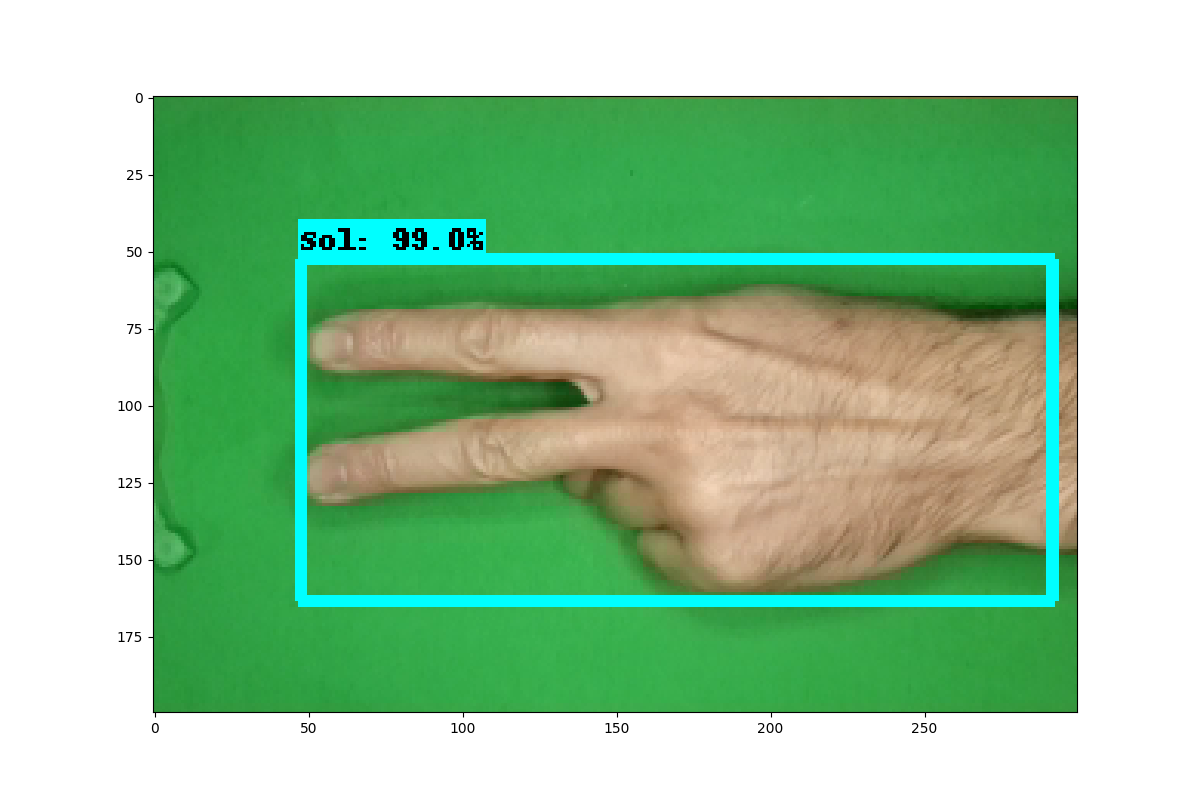
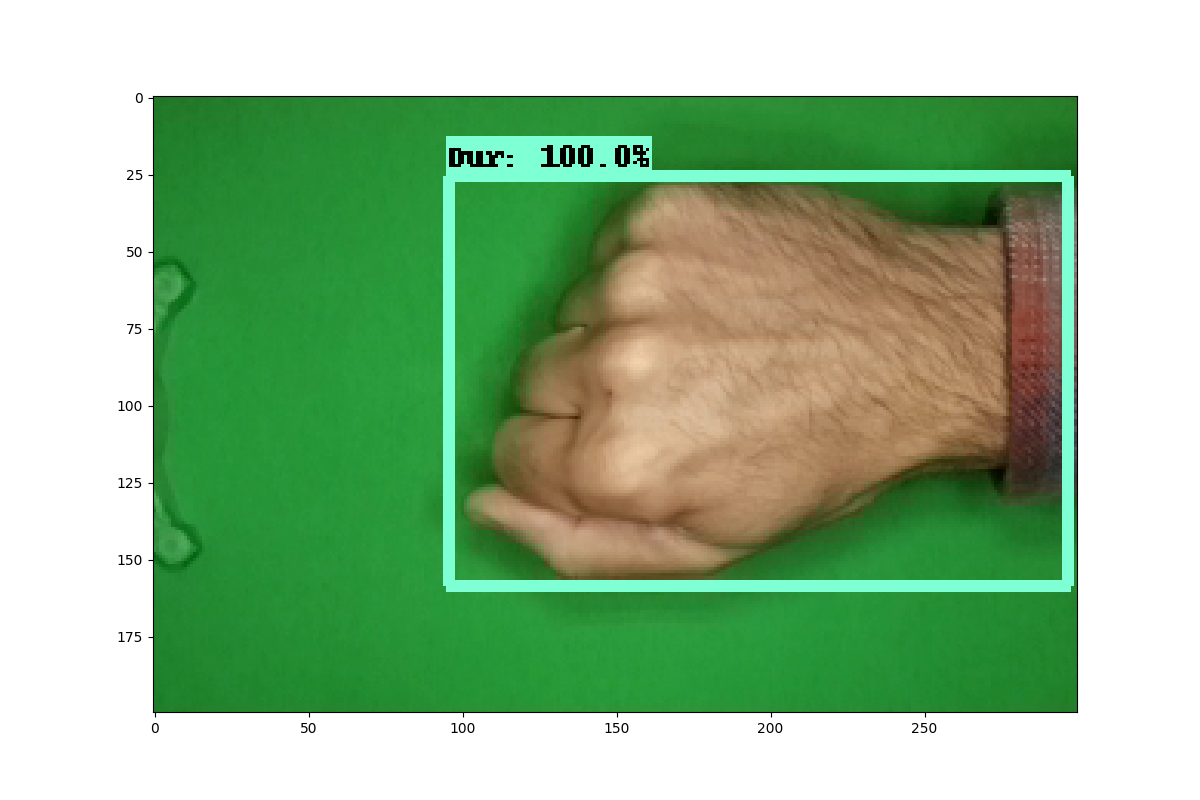
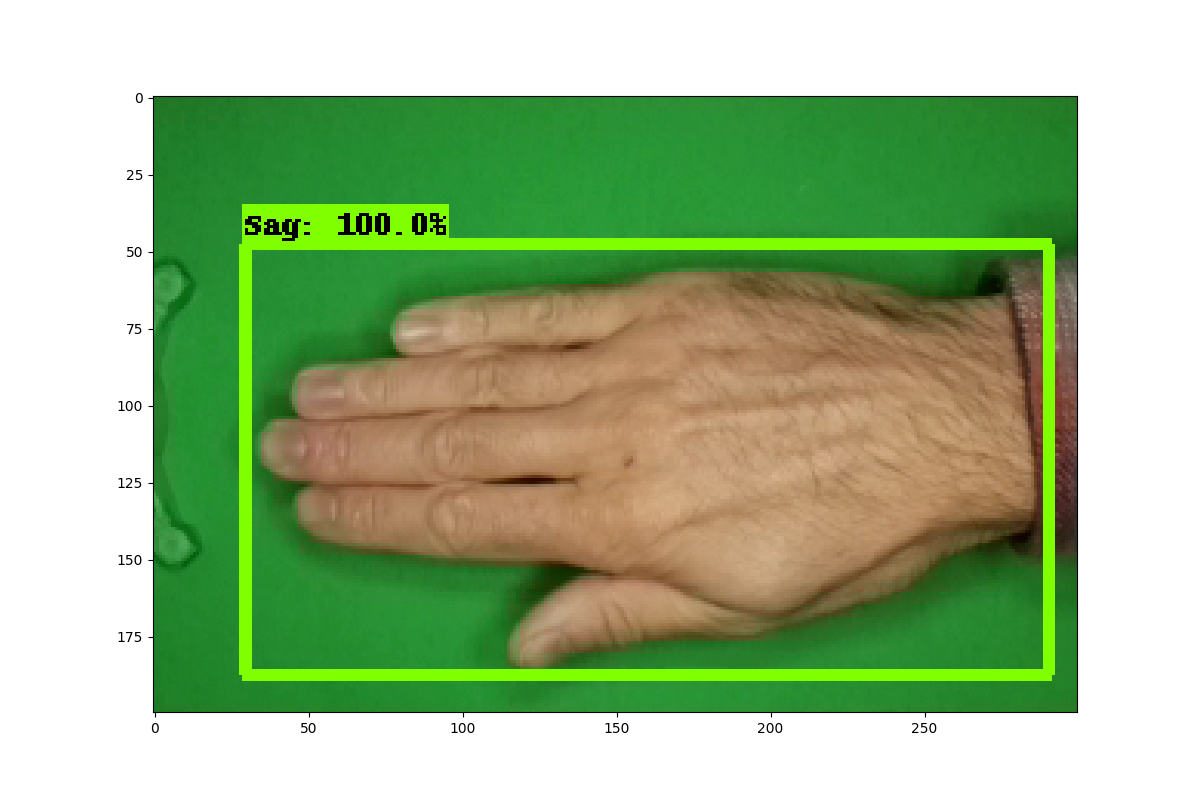

## ![#1589F0](https://via.placeholder.com/15/1589F0/000000?text=+) Özet

* Kendi verileriniz ile eğitim yapıp kendi nesnelerinizi görüntü içersinden tespit edebilirsiniz.
* Bu şekilde modeller eğitip kendi projelerinize entegre edebilirsiniz.

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) Kaynaklar

* https://github.com/tensorflow/models/tree/master/research/object_detection
* https://www.udemy.com/course/bilgisayar-gorusu/
* https://www.pyimagesearch.com/2020/06/22/turning-any-cnn-image-classifier-into-an-object-detector-with-keras-tensorflow-and-opencv/
* https://github.com/AhmetFurkanDEMIR/Istanbul-through-the-eyes-of-the-computer

# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) İletişim - Hataların Çözümü

* Karşılaşacağınız herhangi bir hatayı bana sorabilirsiniz;

    * http://ahmetfurkandemir.com/İletişim/